**Download** (right-click, save target as ...) this page as a Jupyterlab notebook from: [ES-1](http://54.243.252.9/ce-5319-webroot/2-Exercises/ES-4/ES4.ipynb)

___

# <font color=darkblue>CE 5319 Machine Learning for Civil Engineers <br> Fall 2022 Exercise Set 4</font>

**LAST NAME, FIRST NAME**

**R00000000**

___

### Purpose : 
Obtain databases for use in class and homework exercises.
 
### Assessment Criteria : 
Completion, results plausible, format correct, calculations (Jupyter Notebook) are shown.  
___

## Problem 1

Consider fingerprinting of origin of a nuclear event (suppose something goes boom, and you are tasked with placing blame).  A fusion device would discharge some unreacted plutonium 238, fingerprinting to either the USA, Russia, UK, France or China.  It is not believed India or North Korea have viable fusion devices. Plutionium mixed with other fallout materials is hard to detect, but even minute amounts emit alpha particles (which can be traced!).

Alpha detectors record the intensity of alpha particle strikes in counts per second.  A prediction engine (regression model) is used to estimate the alpha counts (target variable) from plutonium activity (feature variable).  

Consider the calibration set contained at [PLUTONIUM.DAT](http://54.243.252.9/ce-5319-webroot/2-Exercises/ES-3/PLUTONIUM.DAT).  The first column is alpha strikes per second, the second is plutonium activity. These data are from four different plutonium standards containing known plutonium activity. The levels are 0.0, 5.0, 10.0, 20.0 picocuries per gram.  Each standard was exposed to the detetection device from 4 to 10 times and the rate of alpha strikes was observed for each replication.

Using these data build a prediction engine that takes as input alpha strikes per second and predicts plutonium activity (an inverse regression) for a particular detector instrument.  

In your model building consider
- Do any of the data appear to be outliers?  
- Likely your original prototype engine will be $Y_{\alpha} \propto X_{Pu}$
- Is the variance constant at different plutonium activities?

Next consider some transformations
- First transformation $\sqrt{Y_{\alpha}} \propto X_{Pu}$
- Second transformation $\sqrt{Y_{\alpha}} \propto \sqrt{X_{Pu}}$

Using your favorite engine render an opinion of residue from a smoldering crater was caused by a fusion device if the instrument measures an alpha activity of 0.0061 counts per second


## Acquire and Load the Data

In [21]:
import pandas as pd
# Read the remote directly from its url (Jupyter):
url = "http://54.243.252.9/ce-5319-webroot/2-Exercises/ES-3/PLUTONIUM.DAT"
# Assign colum names to the dataset
names = ['alpha', 'plutonium']
# Read dataset to pandas dataframe
dataset = pd.read_csv(url, delim_whitespace=True )
#dataset = pd.read_csv(url)
dataset.head()

,alpha,Pu
0,0.150,20
1,0.004,0
2,0.069,10
3,0.030,5
4,0.011,0


## Exploratory Plotting

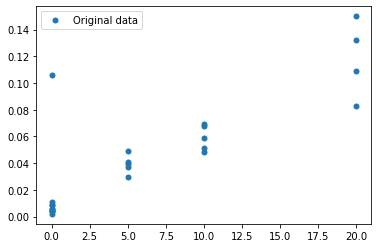

In [23]:
import matplotlib.pyplot as plt
_ = plt.plot(dataset['Pu'],dataset['alpha'], 'o', label='Original data', markersize=5)
#_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()

plt.show()

Visual examination of the various responses at different inputs suggests variance changes with input.  Also the Alpha value at (0,0.11) is different from at least 4 other values at the zero input level - this observation might be some kind of outlier.

Proceeding with naive OLS

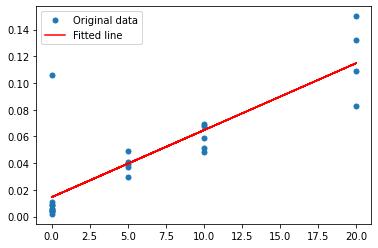

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso(alpha=1) #alpha is the lambda weight close to 0 is ordinary linear regression
# Ridge Regression
ridge = Ridge(alpha=1)  #alpha is the lambda weight close to 0 is ordinary linear regression

X = dataset['Pu'].values
y = dataset['alpha'].values

lr.fit(X.reshape(-1, 1), y) # fit a linear model
y_pred_lr = lr.predict(X.reshape(-1, 1)) # make predictions

_ = plt.plot(dataset['Pu'],dataset['alpha'], 'o', label='Original data', markersize=5)
_ = plt.plot(dataset['Pu'], y_pred_lr, 'r', label='Fitted line')
_ = plt.legend()

plt.show()

In [ ]:
Now repeat, but will drop the outlier

In [37]:
dataset.tail(3)

,alpha,Pu
21,0.002,0
22,0.049,5
23,0.106,0


In [38]:
dfnew = dataset.drop([23])
dfnew.tail(2)

,alpha,Pu
21,0.002,0
22,0.049,5


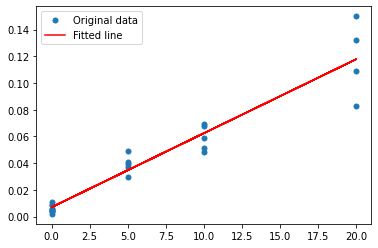

In [39]:
X = dfnew['Pu'].values
y = dfnew['alpha'].values

lr.fit(X.reshape(-1, 1), y) # fit a linear model
y_pred_lr = lr.predict(X.reshape(-1, 1)) # make predictions

_ = plt.plot(dfnew['Pu'],dfnew['alpha'], 'o', label='Original data', markersize=5)
_ = plt.plot(dfnew['Pu'], y_pred_lr, 'r', label='Fitted line')
_ = plt.legend()

plt.show()

Now some transformations on the data (keeping the outlier out).

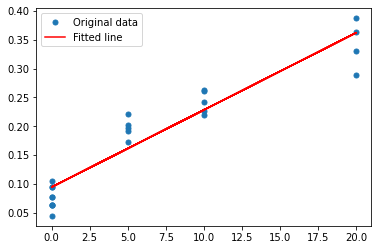

In [47]:
#mydf['reallynew'] = mydf['col2'].apply(times2)

def root(x):
    import math
    root = math.sqrt(x)
    return(root)

X = dfnew['Pu'].values
y = dfnew['alpha'].apply(root).values

lr.fit(X.reshape(-1, 1), y) # fit a linear model
y_pred_lr = lr.predict(X.reshape(-1, 1)) # make predictions

_ = plt.plot(dfnew['Pu'],dfnew['alpha'].apply(root), 'o', label='Original data', markersize=5)
_ = plt.plot(dfnew['Pu'], y_pred_lr, 'r', label='Fitted line')
_ = plt.legend()

plt.show()

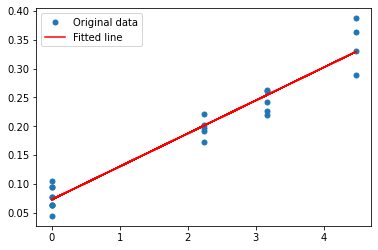

In [49]:
X = dfnew['Pu'].apply(root).values
y = dfnew['alpha'].apply(root).values

lr.fit(X.reshape(-1, 1), y) # fit a linear model
y_pred_lr = lr.predict(X.reshape(-1, 1)) # make predictions

_ = plt.plot(dfnew['Pu'].apply(root),dfnew['alpha'].apply(root), 'o', label='Original data', markersize=5)
_ = plt.plot(dfnew['Pu'].apply(root), y_pred_lr, 'r', label='Fitted line')
_ = plt.legend()

plt.show()

---

## Problem 2

Obtain the National Bridge Inventory Database (from ES-2)and perform a rudimentary data analysis and content summary.

Extract Texas-data

Extract North







---

## Problem 3

Mirror the Crack Images Database Directory.

The container directory is at: [http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/](http://54.243.252.9/ce-5319-webroot/1-Databases/MaterialCracking/)

The literature document from which this data arises is [Machine Learning Classifiers for Surface Crack Detection in Fracture
Experiments](http://54.243.252.9/ce-5319-webroot/3-Readings/1-s2.0-S002074032100429X-main.pdf)



---

## Problem 4

Obtain the two databases related to forest fires; the container directories are:

1. https://archive-beta.ics.uci.edu/ml/datasets/forest+fires 
2. https://archive-beta.ics.uci.edu/ml/datasets/algerian+forest+fires+dataset

Prepare written description of these two datasets, what do they contain, and can they be merged into a larger single database (i.e. what are the common features, maybe with different names)